In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchviz import make_dot
from matplotlib import pyplot as plt
import cv2 as cv

In [7]:
# Define the XOR input data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Define the corresponding XOR output data
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)

In [22]:
# Define a neural network model with an additional hidden layer
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        #self.fc2 = nn.Linear(4, 3)  # Additional hidden layer
        self.fc3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x = torch.relu(self.fc2(x))  # Apply the activation function for the additional hidden layer
        x = self.sigmoid(self.fc3(x))
        return x

In [23]:
# Create an instance of the model
model = XORModel()
# Define the loss function (binary cross-entropy) and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [24]:
# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.0922
Epoch [2000/10000], Loss: 0.0203
Epoch [3000/10000], Loss: 0.0105
Epoch [4000/10000], Loss: 0.0069
Epoch [5000/10000], Loss: 0.0051
Epoch [6000/10000], Loss: 0.0040
Epoch [7000/10000], Loss: 0.0033
Epoch [8000/10000], Loss: 0.0028
Epoch [9000/10000], Loss: 0.0024
Epoch [10000/10000], Loss: 0.0021


In [25]:
# Evaluate the model
with torch.no_grad():
    predicted = model(X)
    predicted = (predicted > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 100.00%


In [26]:
# Make predictions
print("Predictions:")
for i in range(len(X)):
    input_data = X[i]
    prediction = model(input_data).item()
    print(f"Input: {input_data.tolist()}, Predicted Output: {prediction:.4f}")

Predictions:
Input: [0.0, 0.0], Predicted Output: 0.0059
Input: [0.0, 1.0], Predicted Output: 0.9990
Input: [1.0, 0.0], Predicted Output: 0.9990
Input: [1.0, 1.0], Predicted Output: 0.0007


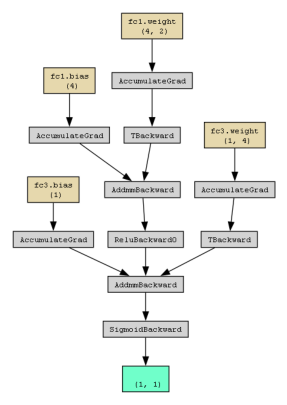

In [27]:
from torchview import draw_graph#model = model(X)batch_size = 1# device='meta' -> no memory is consumed for visualizationmodel_graph = draw_graph(model, input_size=(batch_size, 2), device='meta')model_graph.visual_graph